# MODULE 4 - BIG DATA FUNDAMENTALS

## 4.1.1.1 Data Volume

In [15]:
# ── Cell 1: configure Spark env and init findspark ──
import os

# 1) Where you unpacked Spark
os.environ['SPARK_HOME'] = '/Users/jfelixsb/spark'

# 2) Your JDK path
os.environ['JAVA_HOME'] = '/Library/Java/JavaVirtualMachines/jdk-21.jdk/Contents/Home'

# 3) Put Spark’s bin first in PATH
os.environ['PATH'] = os.path.join(os.environ['SPARK_HOME'], 'bin') + ':' + os.environ.get('PATH', '')

# 4) (Optional) helps PySpark find everything
#    Make sure you’ve `pip install findspark` in your venv
import findspark

findspark.init()

In [11]:
from pyspark import SparkConf, SparkContext

conf = SparkConf() \
    .setAppName("FacebookInteractionsCount") \
    .setMaster("local[*]")

# This will either return your already-running sc, or make it fresh
sc = SparkContext.getOrCreate(conf=conf)

# sanity check
print("Spark v.", sc._gateway.jvm.org.apache.spark.SPARK_VERSION)

data = sc.textFile('example_files/facebook_interactions.txt')

elements = data.collect()
print(elements)  # Not nice, prints an aray

for elem in elements:
    print(elem)

num_interactions = data.count()

print(f'Number of interactions: {num_interactions}')

Spark v. <py4j.java_gateway.JavaPackage object at 0x115cafb50>
['userId,postId,interactionType,timestamp', '1,1001,like,2025-07-02T10:00:00Z', '2,1001,comment,2025-07-02T10:01:23Z', '3,1002,share,2025-07-02T10:05:12Z', '4,1003,like,2025-07-02T10:08:45Z', '5,1002,like,2025-07-02T10:09:01Z', '6,1003,comment,2025-07-02T10:12:34Z', '7,1004,share,2025-07-02T10:15:55Z', '8,1001,like,2025-07-02T10:18:20Z', '9,1005,comment,2025-07-02T10:20:11Z', '10,1002,like,2025-07-02T10:22:47Z', '11,1004,like,2025-07-02T10:25:30Z', '12,1005,share,2025-07-02T10:28:05Z']
userId,postId,interactionType,timestamp
1,1001,like,2025-07-02T10:00:00Z
2,1001,comment,2025-07-02T10:01:23Z
3,1002,share,2025-07-02T10:05:12Z
4,1003,like,2025-07-02T10:08:45Z
5,1002,like,2025-07-02T10:09:01Z
6,1003,comment,2025-07-02T10:12:34Z
7,1004,share,2025-07-02T10:15:55Z
8,1001,like,2025-07-02T10:18:20Z
9,1005,comment,2025-07-02T10:20:11Z
10,1002,like,2025-07-02T10:22:47Z
11,1004,like,2025-07-02T10:25:30Z
12,1005,share,2025-07-02T10:28

## 4.1.1.2 Data Variety

In [17]:
import os

print("Working directory:", os.getcwd())
!ls -la


Working directory: /Users/jfelixsb/PycharmProjects/Masters_Big_Data_Data_Analytics
total 1016
drwxr-xr-x@ 10 jfelixsb  staff     320 Jul  2 16:13 .
drwxr-xr-x  15 jfelixsb  staff     480 Jun 13 16:52 ..
drwxr-xr-x@ 14 jfelixsb  staff     448 Jul  2 15:26 .git
drwxr-xr-x@  9 jfelixsb  staff     288 Jul  2 16:13 .idea
drwxr-xr-x@ 10 jfelixsb  staff     320 Jul  2 14:46 .venv
drwxr-xr-x@  3 jfelixsb  staff      96 Jul  2 15:32 artifacts
drwxr-xr-x@  7 jfelixsb  staff     224 Jul  2 15:29 example_files
-rw-r--r--@  1 jfelixsb  staff   43581 Jun 14 11:53 module2.ipynb
-rw-r--r--@  1 jfelixsb  staff  447307 Jun 26 12:26 module3.ipynb
-rw-r--r--@  1 jfelixsb  staff   20523 Jul  2 16:13 module4.ipynb


In [28]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import explode, col

# Crear una sesión Spark
spark = (
    SparkSession.builder
    .appName("TwitterDataAnalysis")
    .master("local[*]")
    .getOrCreate()
)

# Leer los datos de Twitter en formato JSON
tweets_df = (spark.read
             .option("multiline", True)
             .json("example_files/tweets.json"))
print(tweets_df)
tweets_df.printSchema()

# 4) Explode the array into separate rows
tweets = tweets_df.select(explode(col("data")).alias("tweet"))

# 5) Pull out the text field
tweets_text = tweets.select(col("tweet.text").alias("text"))

# Mostrar los primeros 5 tweets
tweets_text.show()

# ((tweets_df
#  .select(explode(col("data")).alias("tweet"))
#  .select(col("tweet.text").alias("text")))
#  .show())

DataFrame[data: array<struct<id:bigint,likes:bigint,text:string,timestamp:string,user:string>>]
root
 |-- data: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- id: long (nullable = true)
 |    |    |-- likes: long (nullable = true)
 |    |    |-- text: string (nullable = true)
 |    |    |-- timestamp: string (nullable = true)
 |    |    |-- user: string (nullable = true)

+--------------------+
|                text|
+--------------------+
|Just had the best...|
|RT @charlie: Spar...|
|Preparing my talk...|
|Sunny day in Mont...|
|Does anyone know ...|
|Deploying my firs...|
|Lunch break! 🍔 #...|
|Debugging streami...|
|Schema evolution ...|
|Wrapping up today...|
+--------------------+

+--------------------+
|                text|
+--------------------+
|Just had the best...|
|RT @charlie: Spar...|
|Preparing my talk...|
|Sunny day in Mont...|
|Does anyone know ...|
|Deploying my firs...|
|Lunch break! 🍔 #...|
|Debugging streami...|
|Schema evo

## 4.1.1.5 Data Quality

In [29]:
import pandas as pd

In [55]:
# Cargar los datos
df = pd.read_csv('example_files/data_quality_sales.csv')

print('Initial df\n', df)

# Corregir los errores de entrada de datos
df['email'] = df['email'].str.lower()
df['email'] = df['email'].fillna('No Data')
print('\nLowercasing emails\n', df)

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
print('\nTurning non-numeric cells into NaN\n', df)

# Imputar los valores faltantes con la media
# Important to make sure to only compute the mean for the numeric cols
df['sales'] = df['sales'].fillna(df['sales'].mean())
df['temperature'] = df['temperature'].fillna(df['temperature'].mean())
df['humidity'] = df['humidity'].fillna(df['humidity'].mean())
print('\nReplacing the NaN on the numeric cols by the mean of that col\n', df)


# Normalizar las fechas a un formato común
df['date'] = pd.to_datetime(df['date'], errors='coerce')
# df['date'] = df['date'].fillna('No Data')
print('\nReplacing missing dates by NaT\n', df)

# Seleccionar las características relevantes
# df = df['date', 'sales', 'temperature', 'humidity']
print('\nFinal version\n', df[['date', 'email', 'sales', 'temperature']])

Initial df
            date                 email         sales  temperature  humidity
0    2025-07-01     Alice@example.COM           100         22.5      0.30
1    2025-07-02       BOB@Example.com         200.5         21.0       NaN
2    2025-07-03   Charlie@Example.COM           NaN         20.0      0.40
3  invalid_date  danielle@Example.com  not a number         22.0      0.45
4    2025-07-05                   NaN         150.0         24.0      0.50

Lowercasing emails
            date                 email         sales  temperature  humidity
0    2025-07-01     alice@example.com           100         22.5      0.30
1    2025-07-02       bob@example.com         200.5         21.0       NaN
2    2025-07-03   charlie@example.com           NaN         20.0      0.40
3  invalid_date  danielle@example.com  not a number         22.0      0.45
4    2025-07-05               No Data         150.0         24.0      0.50

Turning non-numeric cells into NaN
            date               

## 4.1.1.6 Data Value

In [2]:
import pandas as pd

In [6]:
# Cargar los datos de ventas
df = pd.read_csv('example_files/data_value_sales_data.csv')
print(df)
# Agrupar por producto y sumar las ventas
product_sales = df.groupby('product_name').sum()
# Ordenar los productos por ventas
top_products = product_sales.sort_values(
    by='sales_amount',
    ascending=False
).head(10)

print(top_products)

   product_name  sales_amount
0      Widget A           100
1      Widget B           200
2      Widget A           150
3      Gadget X           300
4      Widget C           120
5      Gadget X           250
6      Widget B           180
7   Thingamajig            75
8      Widget C           200
9      Gadget Y           400
10     Gadget Y           150
11  Thingamajig           125
              sales_amount
product_name              
Gadget X               550
Gadget Y               550
Widget B               380
Widget C               320
Widget A               250
Thingamajig            200


## 4.3 Data Transformation

In [9]:
data = pd.read_csv('example_files/data_transformation_sales.csv')
# Limpieza. Eliminar las filas con valores faltantes
print(data)

data.dropna(inplace=True)
print(data)
# Transformación. Convertir precios de string a float
data['precio'] = data['precio'].str.replace('$', '').astype(float)

# Agregación. Sumar ventas por producto
ventas_agregadas = data.groupby('producto').sum()
print(ventas_agregadas)

      producto  precio
0     Widget A  $10.50
1     Widget B     $20
2     Widget A   $5.75
3     Gadget X    $100
4     Widget B     $15
5     Gadget Y    $200
6          NaN     $30
7     Gadget Z     NaN
8  Thingamajig  $75.25
9     Gadget X     $50
      producto  precio
0     Widget A  $10.50
1     Widget B     $20
2     Widget A   $5.75
3     Gadget X    $100
4     Widget B     $15
5     Gadget Y    $200
8  Thingamajig  $75.25
9     Gadget X     $50
             precio
producto           
Gadget X     150.00
Gadget Y     200.00
Thingamajig   75.25
Widget A      16.25
Widget B      35.00


In [10]:

# Create a sample DataFrame
data = {'A': [1, 2], 'B': [3, 4]}
df = pd.DataFrame(data, index=['row1', 'row2'])
print("Original DataFrame:")
print(df)

# Stack the DataFrame
stacked_df = df.stack()
print("\nStacked DataFrame (Series):")
print(stacked_df)

Original DataFrame:
      A  B
row1  1  3
row2  2  4

Stacked DataFrame (Series):
row1  A    1
      B    3
row2  A    2
      B    4
dtype: int64


## 4.5.1 Data Association
$ Support(X) $: fraction of all baskets that contain itemset X <br>
$ Support(A \rightarrow B) = Support(A \cup B) $ <br>
$ Confidence(A \rightarrow B) = \frac{Support(A \cup B)}{Support(A)} $ <br>
$ Lift(A \rightarrow B) = \frac{Confidence(A \rightarrow B)}{Support(B)} $

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
# Datos ficticios de compras
dataset = [
    ['leche', 'pan', 'mantequilla'],
    ['leche', 'pan'],
    ['mantequilla', 'pan', 'jugo'],
    ['leche', 'manzana'],
    ['manzana', 'jugo'],
    ['pan', 'jugo', 'leche']
]
# Transformar datos para Apriori
df = pd.DataFrame(dataset)
print(df)
oht = pd.get_dummies(df.stack()).groupby(level=0).sum()
print(oht)
# Aplicar Apriori
frequent_itemsets = apriori(oht, min_support=0.5, use_colnames=True)
print(frequent_itemsets)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
print(rules)

             0        1            2
0        leche      pan  mantequilla
1        leche      pan         None
2  mantequilla      pan         jugo
3        leche  manzana         None
4      manzana     jugo         None
5          pan     jugo        leche
   jugo  leche  mantequilla  manzana  pan
0     0      1            1        0    1
1     0      1            0        0    1
2     1      0            1        0    1
3     0      1            0        1    0
4     1      0            0        1    0
5     1      1            0        0    1
    support      itemsets
0  0.500000        (jugo)
1  0.666667       (leche)
2  0.666667         (pan)
3  0.500000  (leche, pan)
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []


/Users/jfelixsb/PycharmProjects/Masters_Big_Data_Data_Analytics/.venv/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## 4.5.2 Data Mining

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 1) Load the data
data = load_iris()
X = data.data          # shape (150, 4): the four measurements
y = data.target        # shape (150,): class labels 0,1,2

# 2) Split into train & test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2      # 20% for testing, 80% for training
)

# 3) Instantiate the model
clf = DecisionTreeClassifier(
    criterion='gini',  # default splitting criterion
    max_depth=None,    # no limit on tree depth
    random_state=42    # for reproducible splits
)

# 4) Train (fit) the model on the training set
clf.fit(X_train, y_train)

# 5) Predict labels on the test set
predictions = clf.predict(X_test)

print(predictions)


[2 1 2 0 2 1 1 1 1 2 1 0 1 1 2 1 0 0 0 2 2 0 2 0 1 2 0 0 0 0]


In [23]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions, target_names=data.target_names))


Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



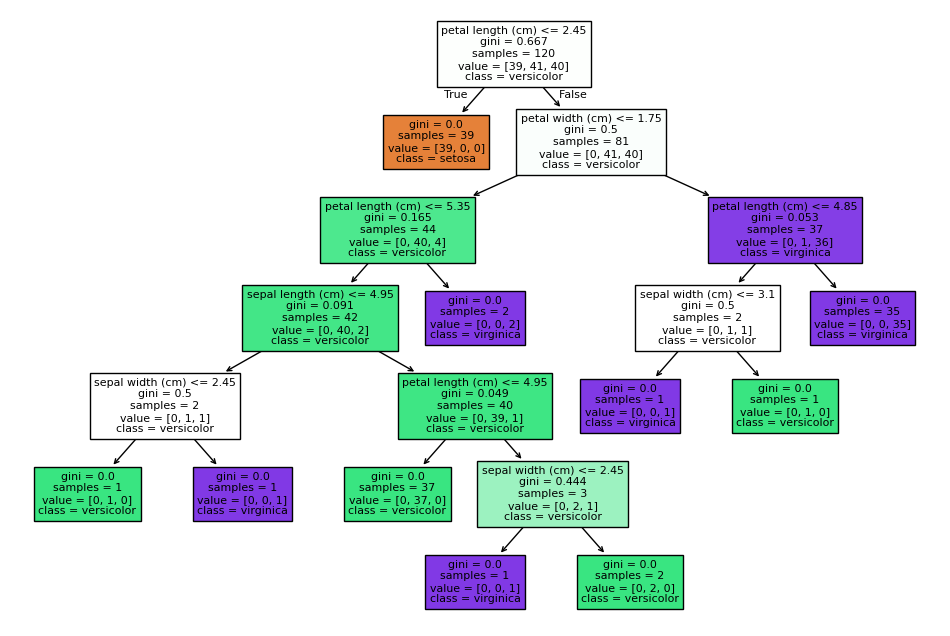

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()
